In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

In [8]:
df = pd.read_excel('data\\hallitus.xlsx')

In [9]:
print(df.columns)
df.head()


Index(['Id', 'Start time', 'Completion time', 'Email', 'Name', 'Language',
       'Kilta\n',
       'Mitkä arvoista yhdistät turkulaiseen teekkariuteen? (valitse niin monta kuin haluat)\n',
       'Turkulaisen teekkarikulttuuriin tärkeimmät arvot\n',
       'Kehityksen kohteet\n',
       'Aikaisempaan pohdintaan pohjaten: vuosien 2025–2027 päätavoitteet\n'],
      dtype='object')


,Id,Start time,Completion time,Email,Name,Language,Kilta\n,Mitkä arvoista yhdistät turkulaiseen teekkariuteen? (valitse niin monta kuin haluat)\n,Turkulaisen teekkarikulttuuriin tärkeimmät arvot\n,Kehityksen kohteet\n,Aikaisempaan pohdintaan pohjaten: vuosien 2025–2027 päätavoitteet\n
0,1,2024-06-03 10:30:06,2024-06-03 10:40:29,anonymous,NaN,Suomi,Datateknologerna,uudistumiskykyinen;keskusteleva;halu kehittyä;...,"Yhteisöllinen, muutoskykyinen, näkyvä","Kaksikielisempi tapahtumissa, esim. Jäynästart...",Parempi rakenne ja suunnitelmallisuus tapahtum...
1,2,2024-06-06 20:42:40,2024-06-06 20:47:33,anonymous,NaN,Suomi,TK hallitus,yhdistävä;turvallinen;uudistumiskykyinen;yhden...,"Modernius, kehittymishaluisuus, kaksikielisyys",ÅAn kiltojen jäsenten aktiivisuus TKn tapahtum...,"Uusien kiltojen teekkarikasvatus, toiminnan sk..."
2,3,2024-07-02 13:58:08,2024-07-02 14:03:23,anonymous,NaN,Suomi,TK,yhdistävä;uudistumiskykyinen;yhteisöllisyys;ed...,yhteisöllisyys\ntasa-arvo\nkyky kehittyä,selkeämpää viestintää\nyhtenäiset arvot ja tav...,Turkulainen teekkarikulttuuri valtakunnallisen...


In [10]:
column_name = df.columns[7]
responses = df[column_name].dropna()

def count_responses(responses):
    counter = Counter()
    for response in responses:
            if isinstance(response, str):  # Ensure response is a string to prevent whitespace answers
                choices = [choice.strip() for choice in response.split(';') if choice.strip()]
                counter.update(choices)
    return counter

result = count_responses(responses)

if not isinstance(result, dict):
    result = dict(result)
    
    
sorted_results = dict(sorted(result.items(), key=lambda x: x[1], reverse=True))
sorted_results.pop('', None)

for option, count in sorted_results.items():
    print(f"'{option}': {count}")


'uudistumiskykyinen': 3
'halu kehittyä': 3
'yhdistävä': 3
'edelläkävijä': 2
'keskusteleva': 1
'jatkuvuus': 1
'vuorovaikutteisuus': 1
'hajallaanoleva': 1
'turvallinen': 1
'yhdenvertaisuus': 1
'ainutlaatuinen': 1
'laadukas': 1
'yhteisöllisyys': 1


In [11]:
result_df = pd.DataFrame.from_dict(sorted_results, orient='index', columns=['Count'])
result_df.index.name = 'Option'
result_df


,Count
Option,
uudistumiskykyinen,3
halu kehittyä,3
yhdistävä,3
edelläkävijä,2
keskusteleva,1
jatkuvuus,1
vuorovaikutteisuus,1
hajallaanoleva,1
turvallinen,1


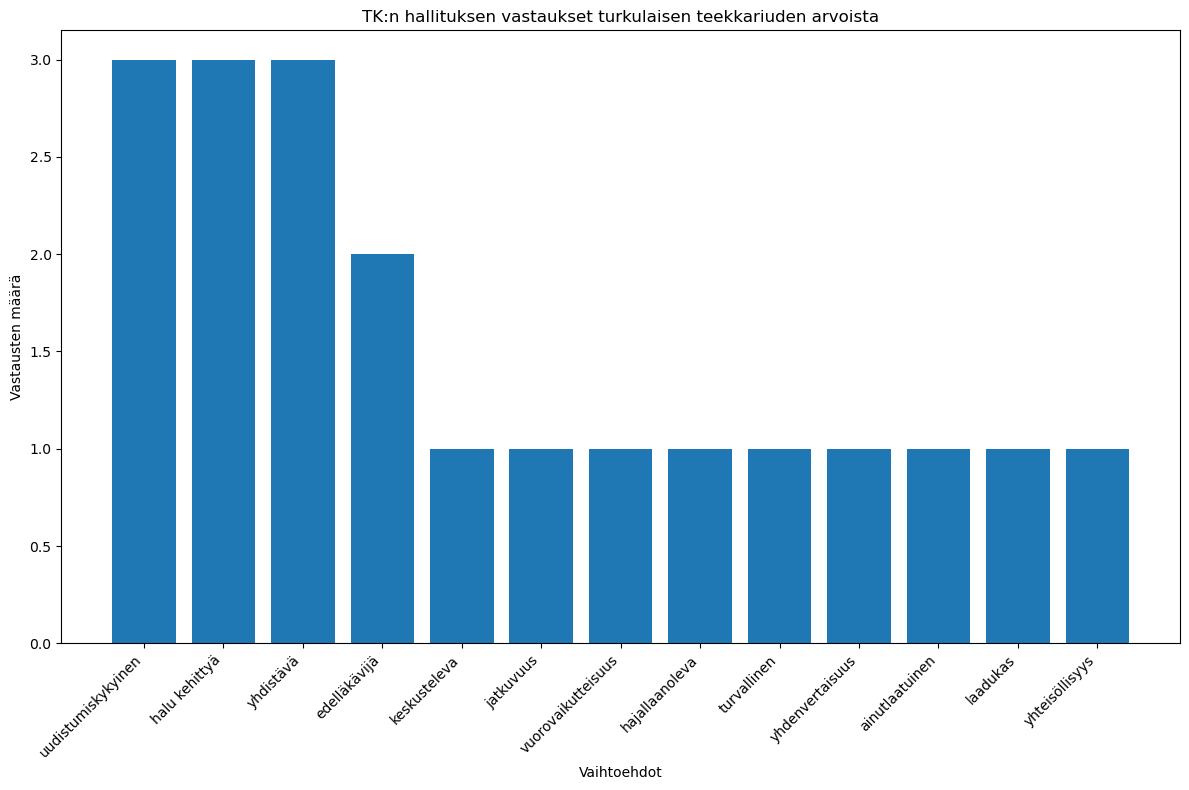

In [15]:
plt.figure(figsize=(12, 8))
plt.bar(sorted_results.keys(), sorted_results.values())
plt.title("TK:n hallituksen vastaukset turkulaisen teekkariuden arvoista")
plt.xlabel("Vaihtoehdot")
plt.ylabel("Vastausten määrä")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

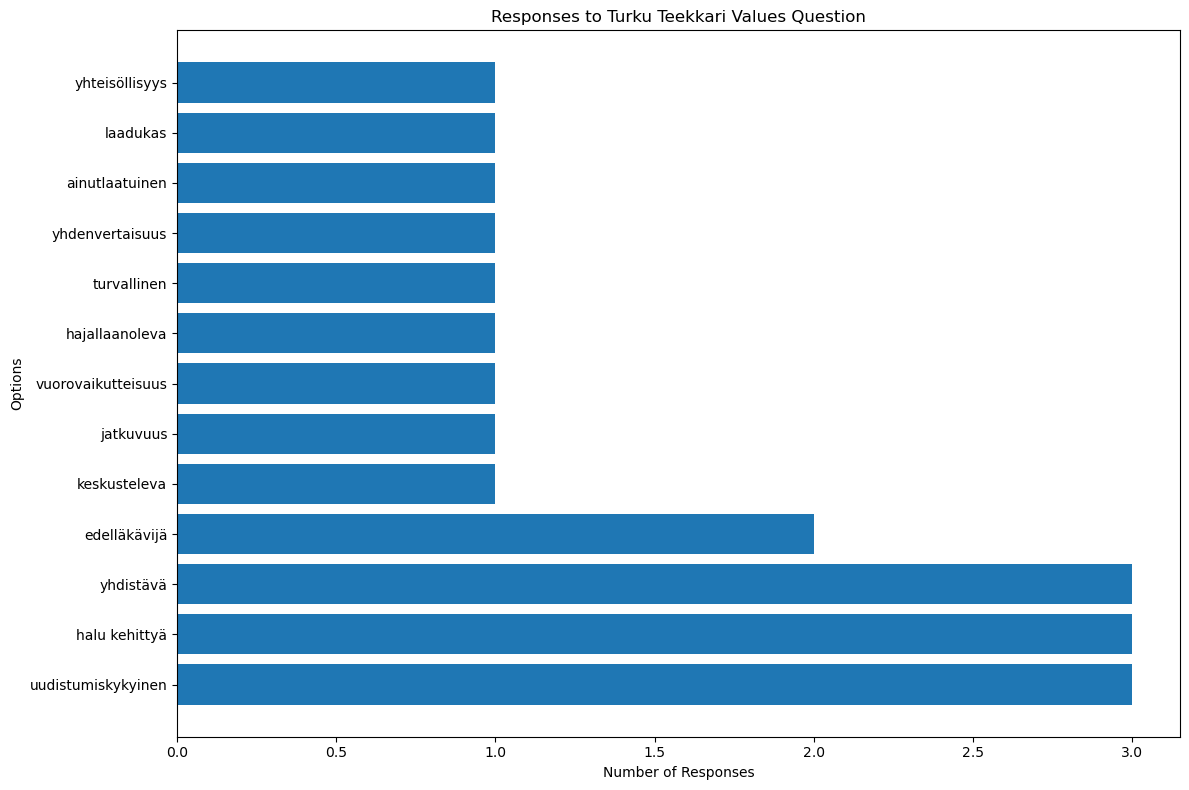

In [13]:
plt.figure(figsize=(12, 8))
plt.barh(list(sorted_results.keys()), list(sorted_results.values()))
plt.title("Responses to Turku Teekkari Values Question")
plt.xlabel("Number of Responses")
plt.ylabel("Options")
plt.tight_layout()
plt.show()